In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
#reading Excel file for task 1
df = pd.read_excel(r"C:\Users\mypc\OneDrive\Desktop\Assignment\Data for Task 1.xlsx")
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,22222280KKBP0890,2820784987,4,1,Y,6NJ26,Sport,15.0,1,1
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2822282187,6,1,N,6MB26,NaN,10.0,0,1
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,21222222SKBP0119,2822042248,4,1,N,TNN26,Denali,10.0,0,1
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,Y0212811MRFX0180,2820879999,6,1,N,CC20943,2500,14.0,0,1


In [52]:
file_path = r"C:\Users\mypc\OneDrive\Desktop\Assignment\Data for Task 1.xlsx"
excel = pd.ExcelFile(file_path)
df1 = excel.parse('Sheet1')
df2 = excel.parse('Sheet2')

In [53]:
# Task 1.1: Column-Wise Analysis
column_summary = pd.DataFrame({
    'Data Type': df1.dtypes,
    'Null Count': df1.isnull().sum(),
    'Unique Values': df1.nunique(),
    'Sample Values': df1.apply(lambda x: x.dropna().unique()[:3])
})

In [54]:
# Reset index and rename column
column_summary.reset_index(inplace=True)
column_summary.rename(columns={"index": "Column Name"}, inplace=True)

In [55]:
# Save summary to CSV
column_summary.to_csv(r"C:\Users\mypc\OneDrive\Desktop\Assignment\column_summary.csv", index=False)

In [56]:
# Task 1.2: Data Cleaning
# Drop columns with 100% null values
df1_cleaned = df1.dropna(axis=1, how='all')

In [57]:
df1_cleaned

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,22222280KKBP0890,2820784987,4,1,Y,6NJ26,Sport,15.0,1,1
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2822282187,6,1,N,6MB26,NaN,10.0,0,1
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,21222222SKBP0119,2822042248,4,1,N,TNN26,Denali,10.0,0,1
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,Y0212811MRFX0180,2820879999,6,1,N,CC20943,2500,14.0,0,1


In [58]:
# Fill missing string values with mode NaN
for col in df1_cleaned.select_dtypes(include='object').columns:
    df1_cleaned[col].fillna(df1_cleaned[col].mode()[0], inplace=True)

C:\Users\mypc\AppData\Local\Temp\ipykernel_11144\1284514676.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1_cleaned[col].fillna(df1_cleaned[col].mode()[0], inplace=True)
C:\Users\mypc\AppData\Local\Temp\ipykernel_11144\1284514676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col].fillna(df1_cleaned[col].mode()[0], inp

In [59]:
# Fill missing numerical values with median
for col in df1_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    df1_cleaned[col].fillna(df1_cleaned[col].median(), inplace=True)

C:\Users\mypc\AppData\Local\Temp\ipykernel_11144\3298246913.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1_cleaned[col].fillna(df1_cleaned[col].median(), inplace=True)
C:\Users\mypc\AppData\Local\Temp\ipykernel_11144\3298246913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col].fillna(df1_cleaned[col].median(), inpla

In [60]:
# Fix inconsistent capitalization in categorical columns
for col in df1_cleaned.select_dtypes(include='object').columns:
    df1_cleaned[col] = df1_cleaned[col].str.strip().str.upper()

C:\Users\mypc\AppData\Local\Temp\ipykernel_11144\613636218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[col] = df1_cleaned[col].str.strip().str.upper()


In [61]:
# Task 1.3: Identify Critical Columns + Visualizations
# Assume 5 critical columns:
critical_cols = ['TOTALCOST', 'LBRCOST', 'CAUSAL_PART_NM', 'REPAIR_AGE', 'PLATFORM']

#TOTALCOST = As this includes what amount is spend in total for the repair which is a major concern to the company for analysing profits and losses.

#LBRCOST = This coloumn have the cost of labour for the repaing that particular part and one should know how much labour is csting for repair or changing
#the part as that determines the TOTAL COST..

#CAUSAL_PART_NM = This indicates what needs to be changed in the steering as the first step of knowing what needs to be repaired.

#REPAIR_AGE = This may tell the products warranty and gaureenty.

#PLATFORM = This is major column because it tell us the type of vechile and it ellaborates all the costing and parts reqirement that will be needed in future
#for knowledge.

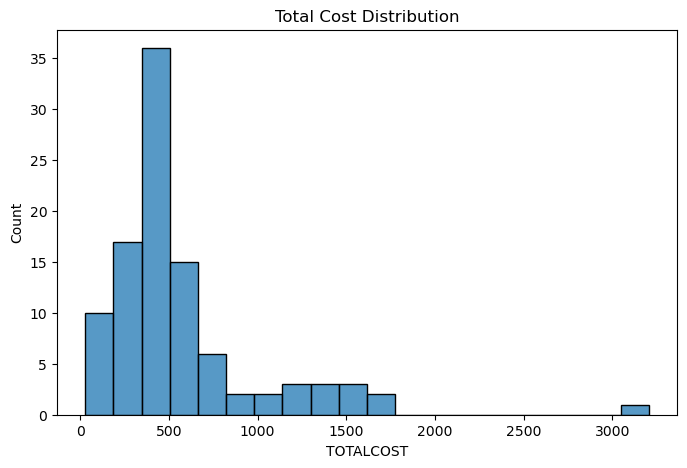

In [71]:

# Histograph of Cost distribution
plt.figure(figsize=(8, 5))
sns.histplot(df1_cleaned['TOTALCOST'], bins=20)
plt.title("Total Cost Distribution")
plt.savefig(r"C:\Users\mypc\OneDrive\Desktop\Assignment\viz_total_cost.png")

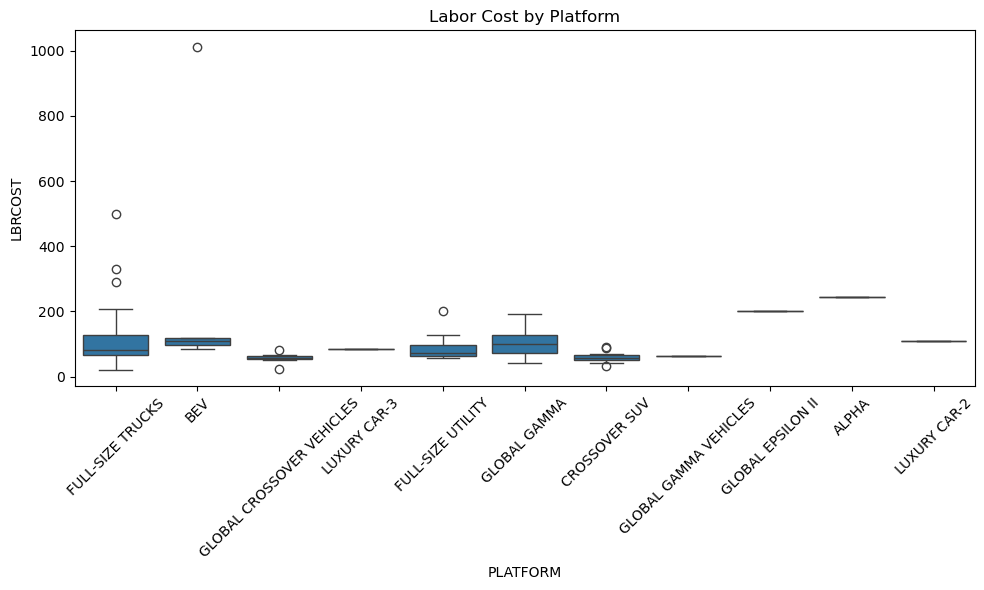

In [72]:
#Box and whisker plot Labor Cost by Platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='PLATFORM', y='LBRCOST', data=df1_cleaned)
plt.xticks(rotation=45)
plt.title("Labor Cost by Platform")
plt.tight_layout()
plt.savefig(r"C:\Users\mypc\OneDrive\Desktop\Assignment\boxlpot_lb_cost_platform.png")

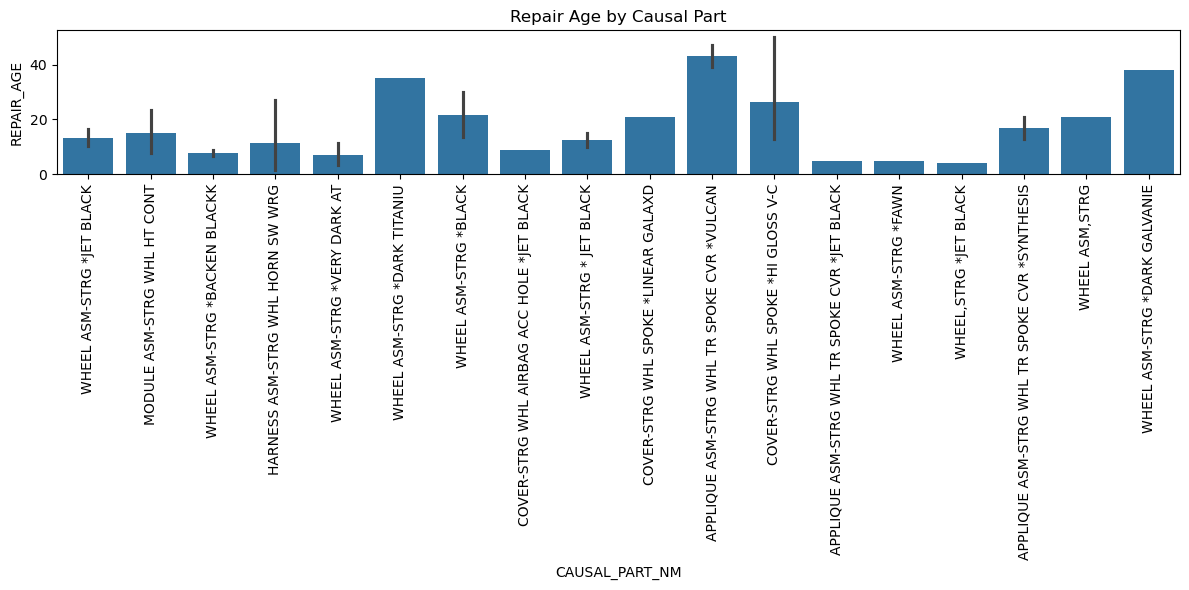

In [73]:
#Bar Graph for Repair Age by Causal Part
plt.figure(figsize=(12, 6))
sns.barplot(x='CAUSAL_PART_NM', y='REPAIR_AGE', data=df1_cleaned)
plt.xticks(rotation=90)
plt.title("Repair Age by Causal Part")
plt.tight_layout()
plt.savefig(r"C:\Users\mypc\OneDrive\Desktop\Assignment\Bar_Graph_repair_age.png")


In [74]:
# Task 1.4: Generate Tags from Free Text
def generate_tags(text):
    text = text.upper()
    keywords = ['STEERING', 'WHEEL', 'NOISE', 'REPLACED', 'INOP', 'DISPLAYED', 'CRACKED']
    return [word for word in keywords if word in text]

df1_cleaned['TAGS'] = df1_cleaned['CUSTOMER_VERBATIM'].apply(generate_tags)


In [85]:
# Tags File to see the counts of tags or Keywords
tag_summary = df1_cleaned['TAGS'].explode().value_counts()
tag_summary.to_csv(r"C:\Users\mypc\OneDrive\Desktop\Assignment\tag_summary.csv")


In [79]:
df1_cleaned["CUSTOMER_VERBATIM"] = df1_cleaned["CUSTOMER_VERBATIM"].str.strip("123._/-")

In [80]:
# Task 1.5: Summary Output
df1_cleaned.to_excel(r"C:\Users\mypc\OneDrive\Desktop\Assignment\cleaned_tagged_data.xlsx", index=False)